**Prática de Realce e detecção de borda**

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/featops.htm



In [40]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

1) Aplique os filtros de realce Sobel e Roberts nas imagens abaixo. Mostre, para o caso do Sobel, uma imagem representando a derivada em x e outra imagem representando a derivada em y

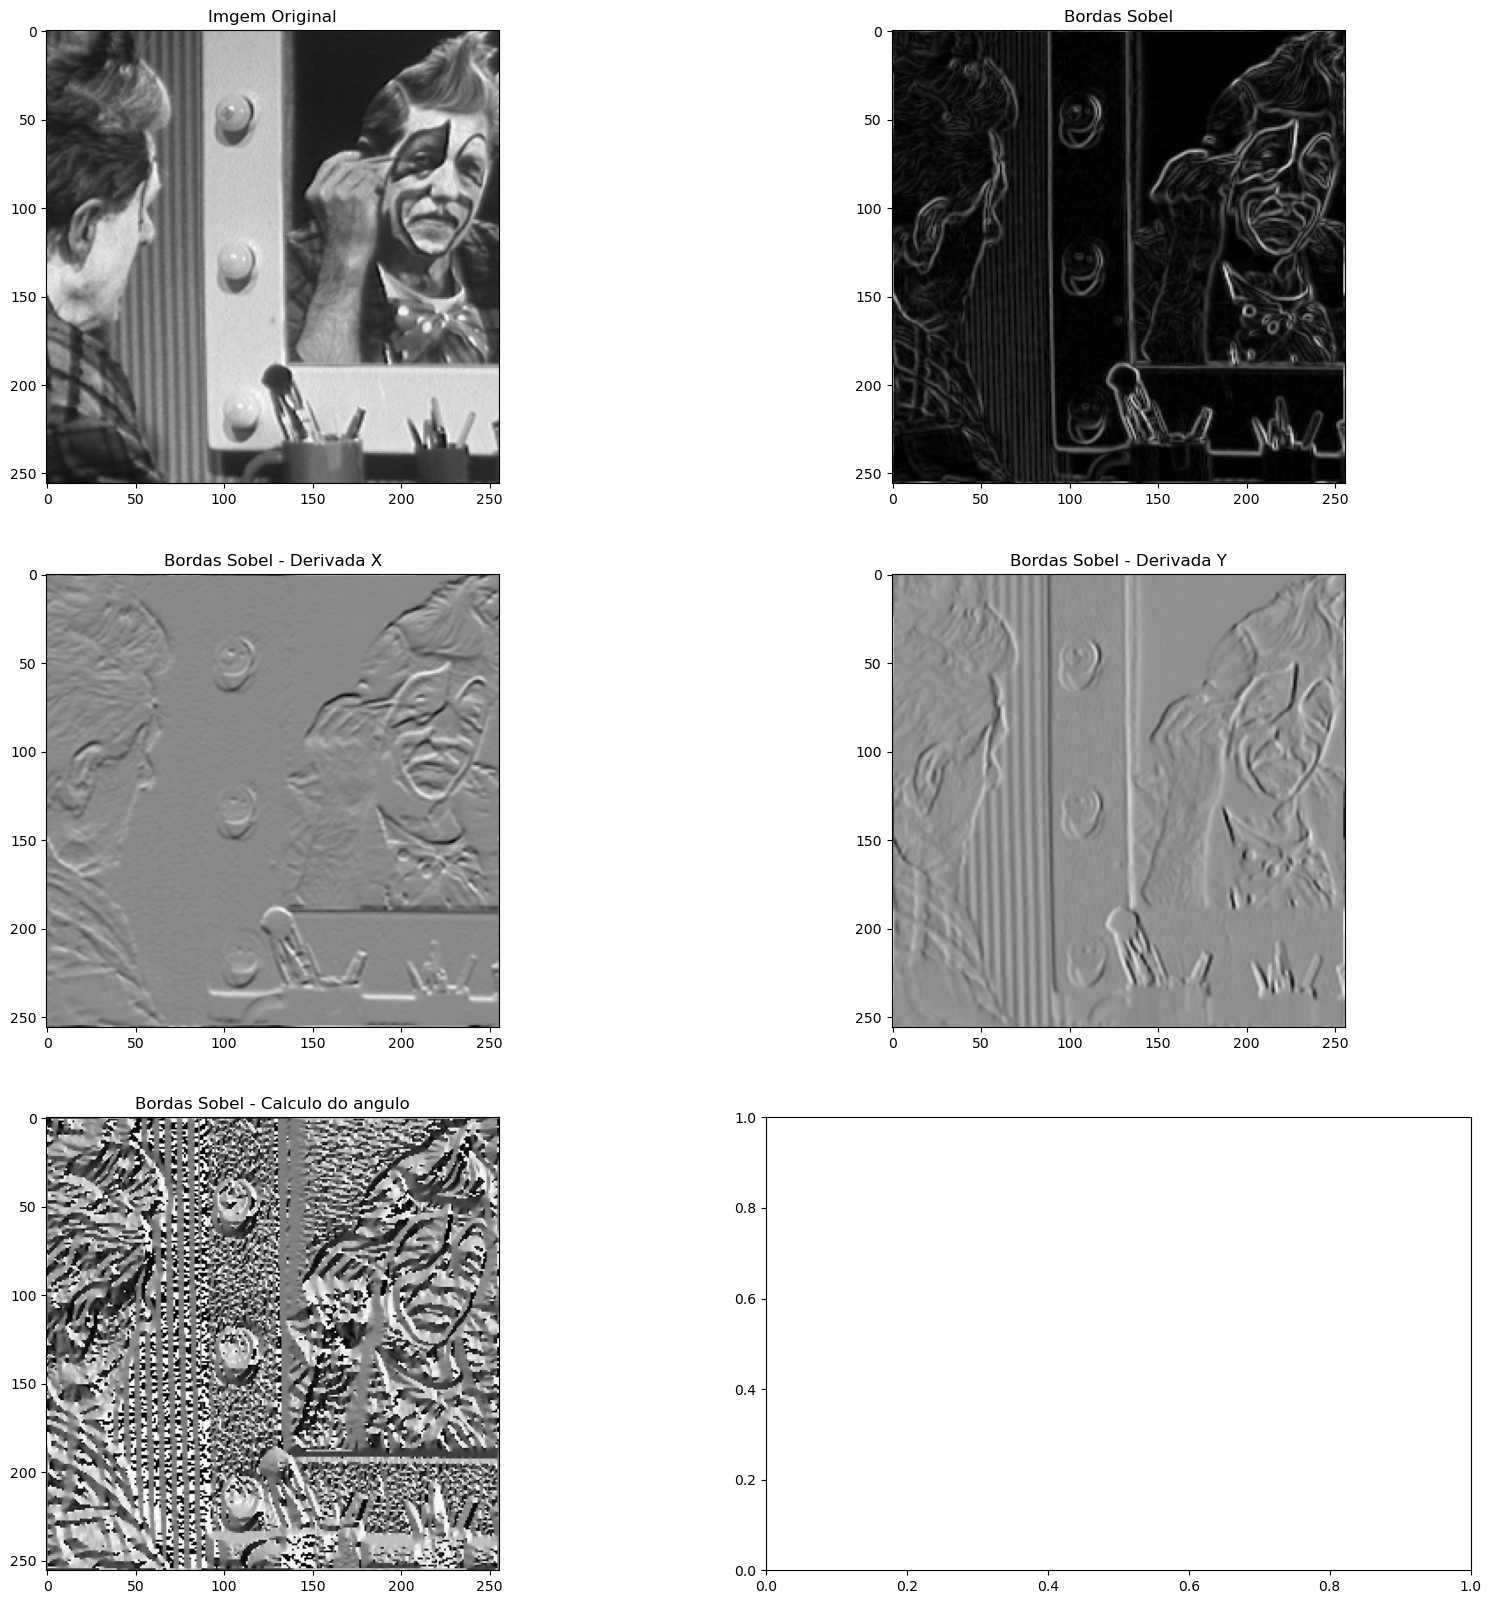

In [43]:
def normalize (image):
    return ((image - image.min())/(image.max() - image.min()) * 255).astype(np.uint8)

img = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
img = np.asarray(img)

maskSobrelX = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

maskSobrelY = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobelX = convolve2d(img,maskSobrelX, mode="same", boundary="wrap")
sobelY = convolve2d(img,maskSobrelY, mode="same", boundary="wrap")
sobelGradient = np.sqrt(sobelX**2 + sobelY**2)
sobelAngulo = np.arctan2(sobelX, sobelY)
sobelAnguloRadiano = np.degrees(sobelAngulo)

sobelImg = normalize(sobelGradient)
sobelImgX = normalize(sobelX)
sobelImgY = normalize(sobelY)
sobelImgAngulo = normalize(sobelAngulo)

f, images = plt.subplots(3,2, figsize = (20,20))
images[0,0].imshow(img, cmap='gray', vmin=0, vmax=255)
images[0,0].title.set_text("Imgem Original")
images[0,1].imshow(sobelImg, cmap='gray', vmin=0, vmax=255)
images[0,1].title.set_text("Bordas Sobel")
images[1,0].imshow(sobelImgX, cmap='gray', vmin=0, vmax=255)
images[1,0].title.set_text("Bordas Sobel - Derivada X")
images[1,1].imshow(sobelImgY, cmap='gray', vmin=0, vmax=255)
images[1,1].title.set_text("Bordas Sobel - Derivada Y")
images[2,0].imshow(sobelImgAngulo, cmap='gray', vmin=0, vmax=255)
images[2,0].title.set_text("Bordas Sobel - Calculo do angulo")


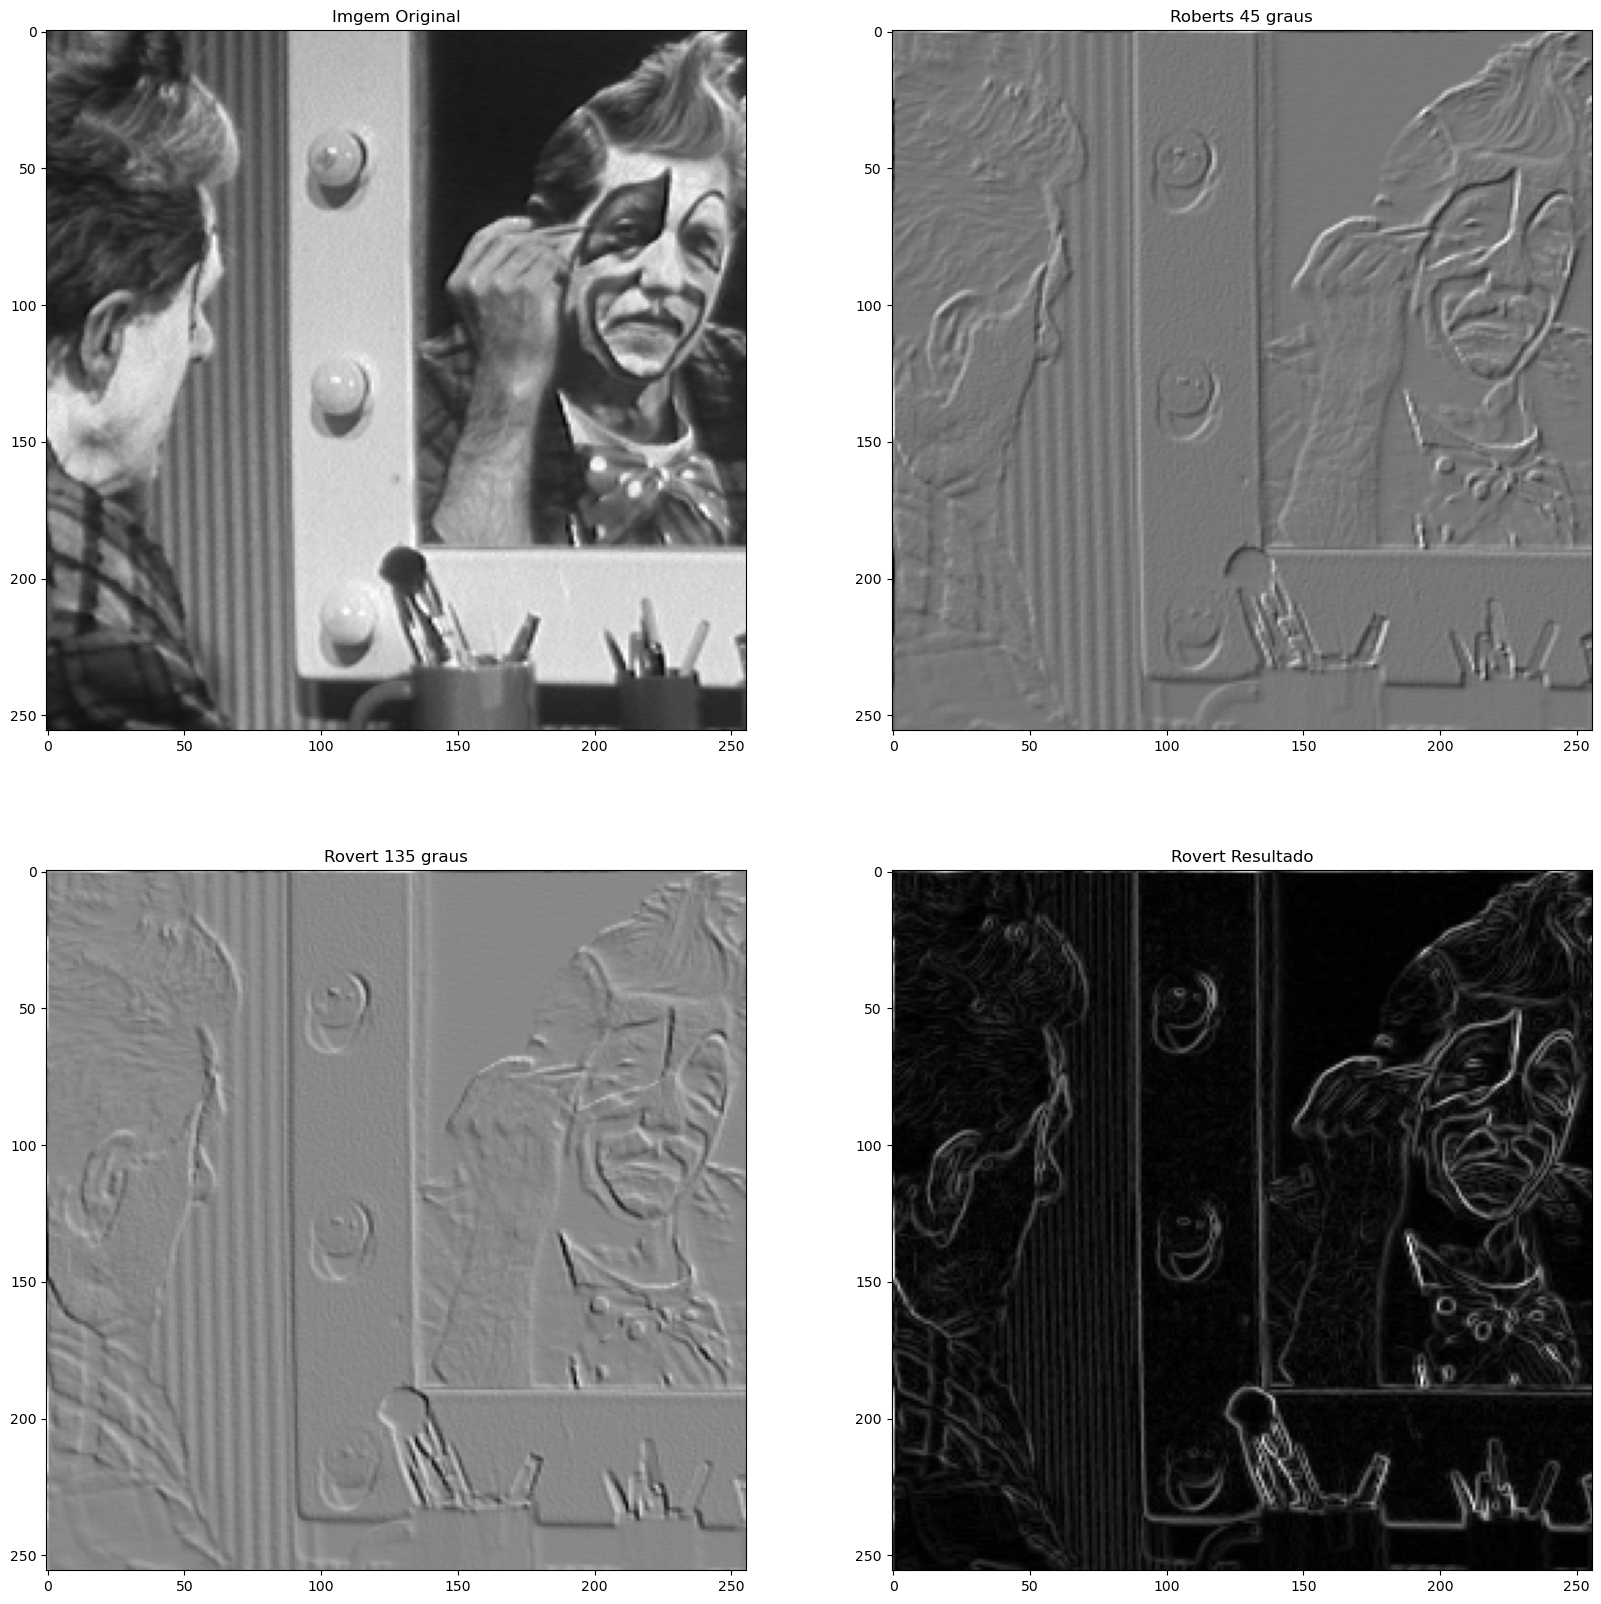

In [44]:
img = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
img = np.asarray(img)

maskRoberts45 = np.array([[1,0],
                    [0, -1]])

maskRoberts135 = np.array([[0,1],
                    [-1,0]])

roberts45 = convolve2d(img,maskRoberts45, mode="same", boundary="wrap")
roberts135 = convolve2d(img,maskRoberts135, mode="same", boundary="wrap")

img_roberts45 = normalize(roberts45)
img_roberts135 = normalize(roberts135)

robertsGradient =  np.sqrt(roberts45**2 + roberts135**2)

f, images = plt.subplots(2,2, figsize = (20,20))
images[0,0].imshow(img, cmap='gray', vmin=0, vmax=255)
images[0,0].title.set_text("Imgem Original")
images[0,1].imshow(img_roberts45, cmap='gray', vmin=0, vmax=255)
images[0,1].title.set_text("Roberts 45 graus")
images[1,0].imshow(img_roberts135, cmap='gray', vmin=0, vmax=255)
images[1,0].title.set_text("Rovert 135 graus")
images[1,1].imshow(robertsGradient, cmap='gray', vmin=0, vmax=255)
images[1,1].title.set_text("Rovert Resultado")

2) Utilizando a imagem do exercício anterior, realce as bordas utilizando (a) Filtro Laplaciano. (b) Unsharp masking. (c) Highboost filtering (escolher um k). (d) K <1 para atenuar

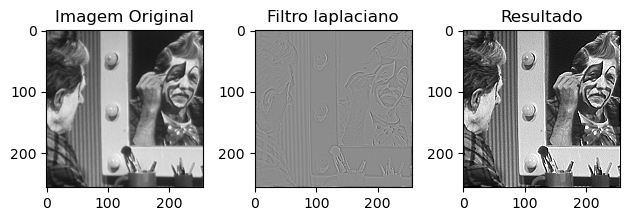

In [46]:

laplacianoFilter = np.array([[ 0 ,1 ,0 ],
[ 1 ,-4  ,1 ],
[ 0  ,1  ,0 ]])

laplacianoConvolution = convolve2d(img,laplacianoFilter, mode="same", boundary="wrap")
img_laplaciano = normalize(laplacianoConvolution)
img_result = img - laplacianoConvolution

plt.subplot(131)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')

plt.subplot(132)
plt.imshow(img_laplaciano, cmap='gray', vmin=0, vmax=255)
plt.title('Filtro laplaciano')

plt.subplot(133)
plt.imshow(img_result, cmap='gray', vmin=0, vmax=255)
plt.title('Resultado')

plt.tight_layout()

plt.show()


3) Aplique o operador Sobel imagem original abaixo e obtenha as outras imagens conforme descrição. We can see that the intensity of many pixels on the surface is as high as along the actual edges. One reason is that the output of many edge pixels is greater than the maximum pixel value and therefore they are `cut off' at 255. To avoid this overflow we scale the range image by a factor 0.25 prior to the edge detection and then normalize the output, as can be seen in (c)

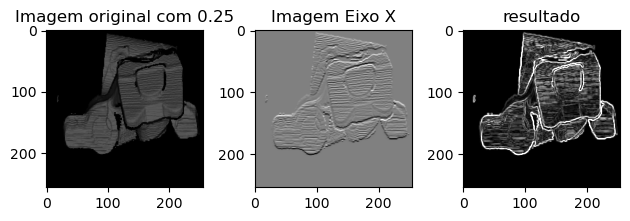

In [30]:
#code here
img1 = cv2.imread("ren1.png", cv2.IMREAD_GRAYSCALE)

img1 = img1 * 0.25

sobelX = convolve2d(img1,maskSobrelX, mode="same", boundary="wrap")
sobelY = convolve2d(img1,maskSobrelY, mode="same", boundary="wrap")
sobelGradient = np.sqrt(sobelX**2 + sobelY**2)
sobelAngulo = np.arctan2(sobelX, sobelY)
sobelAnguloRadiano = np.degrees(sobelAngulo)

sobelImg = normalize(sobelGradient)
sobelImgX = normalize(sobelX)
sobelImgY = normalize(sobelY)
sobelImgAngulo = normalize(sobelAngulo)

sobelResult =  np.sqrt(sobelX**2 + sobelY**2)

plt.subplot(131)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem original com 0.25')

plt.subplot(132)
plt.imshow(cv2.cvtColor(sobelImgX, cv2.COLOR_BGR2RGB))
plt.title('Imagem Eixo X')

plt.subplot(133)
plt.imshow(cv2.cvtColor(sobelImgY, cv2.COLOR_BGR2RGB))
plt.title('Imagem Eixo Y')

plt.subplot(133)
plt.imshow(sobelResult, cmap='gray', vmin=0, vmax=255)
plt.title('resultado')

plt.tight_layout()

plt.show()

4) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

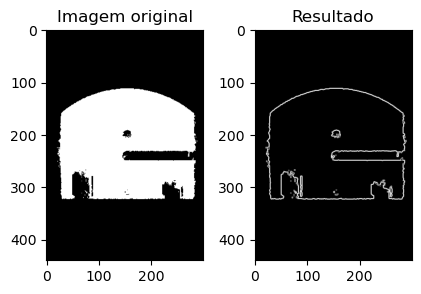

In [47]:

#code here
img1 = cv2.imread("ufo2.png", cv2.IMREAD_GRAYSCALE)

img1 = np.where(img1 > 150, 255, 0)

sobelX = convolve2d(img1,maskSobrelX, mode="same", boundary="wrap")
sobelY = convolve2d(img1,maskSobrelY, mode="same", boundary="wrap")

sobelAngulo = np.arctan2(sobelX, sobelY)

sobelImgX = normalize(sobelX)
sobelImgY = normalize(sobelY)
sobelImgAngulo = normalize(sobelAngulo)

sobelResult =  np.sqrt(sobelX**2 + sobelY**2)

plt.subplot(131)
plt.imshow(img1, cmap='gray')
plt.title('Imagem original')

plt.subplot(132)
plt.imshow(sobelResult, cmap='gray')
plt.title('Resultado')

plt.tight_layout()

# Exiba as imagens
plt.show()

5) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

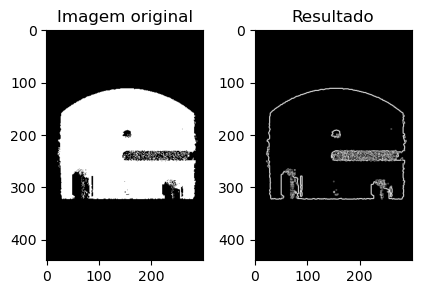

In [50]:
#code here

#code here
img1 = cv2.imread("ufo2noi2.png", cv2.IMREAD_GRAYSCALE)

img1 = np.where(img1 > 150, 255, 0)

sobelX = convolve2d(img1,maskSobrelX, mode="same", boundary="wrap")
sobelY = convolve2d(img1,maskSobrelY, mode="same", boundary="wrap")

sobelImgX = normalize(sobelX)
sobelImgY = normalize(sobelY)
sobelResult =  np.sqrt(sobelX**2 + sobelY**2)

plt.subplot(131)
plt.imshow(img1, cmap='gray')
plt.title('Imagem original')

plt.subplot(132)
plt.imshow(sobelResult, cmap='gray')
plt.title('Resultado')

plt.tight_layout()

plt.show()